In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(32, 32, 3)

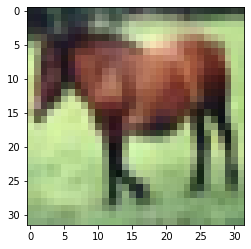

In [3]:
plt.imshow(x_train[7])
x_train[7].shape

In [4]:
# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train)
x_test = np.array(x_test)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [9]:
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer= opt_rms,
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
          epochs=100, batch_size=40, validation_data = (x_test, y_test))

Epoch 1/100
1250/1250 [==============================] - 29s 24ms/step - loss: 1.7751 - accuracy: 0.3456 - val_loss: 1.4469 - val_accuracy: 0.4835
Epoch 2/100
1250/1250 [==============================] - 32s 25ms/step - loss: 1.4494 - accuracy: 0.4782 - val_loss: 1.3064 - val_accuracy: 0.5366
Epoch 3/100
1250/1250 [==============================] - 34s 27ms/step - loss: 1.3212 - accuracy: 0.5281 - val_loss: 1.2443 - val_accuracy: 0.5569
Epoch 4/100
1250/1250 [==============================] - 33s 26ms/step - loss: 1.2370 - accuracy: 0.5604 - val_loss: 1.1256 - val_accuracy: 0.6030
Epoch 5/100
1250/1250 [==============================] - 33s 27ms/step - loss: 1.1725 - accuracy: 0.5849 - val_loss: 1.1149 - val_accuracy: 0.6077
Epoch 6/100
1250/1250 [==============================] - 33s 27ms/step - loss: 1.1264 - accuracy: 0.6032 - val_loss: 0.9980 - val_accuracy: 0.6496
Epoch 7/100
1250/1250 [==============================] - 33s 27ms/step - loss: 1.0942 - accuracy: 0.6174 - val_loss: 1

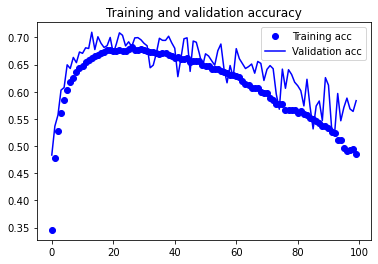

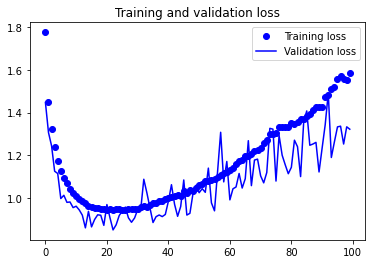

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    # Compile model
    opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy',
              optimizer= opt_rms,
              metrics=['accuracy'])
    return model
# fix random seed for reproducibility
np.random.seed(123)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_test,y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.608899 using {'batch_size': 40, 'epochs': 100}
0.514299 (0.019556) with: {'batch_size': 10, 'epochs': 10}
0.557298 (0.020264) with: {'batch_size': 10, 'epochs': 50}
0.528598 (0.017161) with: {'batch_size': 10, 'epochs': 100}
0.500498 (0.016491) with: {'batch_size': 20, 'epochs': 10}
0.591900 (0.003676) with: {'batch_size': 20, 'epochs': 50}
0.553300 (0.027827) with: {'batch_size': 20, 'epochs': 100}
0.500303 (0.023472) with: {'batch_size': 40, 'epochs': 10}
0.604500 (0.005306) with: {'batch_size': 40, 'epochs': 50}
0.608899 (0.005427) with: {'batch_size': 40, 'epochs': 100}
0.455500 (0.006618) with: {'batch_size': 60, 'epochs': 10}
0.550798 (0.012598) with: {'batch_size': 60, 'epochs': 50}
0.573397 (0.021946) with: {'batch_size': 60, 'epochs': 100}
0.438197 (0.020600) with: {'batch_size': 80, 'epochs': 10}
0.575601 (0.010594) with: {'batch_size': 80, 'epochs': 50}
0.593299 (0.006443) with: {'batch_size': 80, 'epochs': 100}
0.446900 (0.018034) with: {'batch_size': 100, 'epochs':